In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('ESG_GEM_FCT_RES.csv')
df.info()

c:\Users\jchoi02\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672921 entries, 0 to 672920
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Unnamed: 0                                     672921 non-null  object 
 1   Company Name                                   672921 non-null  object 
 2   Periods                                        672921 non-null  object 
 3   Ticker                                         672457 non-null  object 
 4   Universe Returns                               670585 non-null  float64
 5   Region                                         672921 non-null  object 
 6   Country                                        672921 non-null  object 
 7   Sector                                         672921 non-null  object 
 8   MCAP_USD                                       670150 non-null  float64
 9   Earnings Yield                       

In [ ]:
def calculate_rolling_beta(msci_e, msci_s):
    

In [62]:
df['beta'] = df[['MSCI E','MSCI S']].rolling(3).cov() / df[['MSCI E']].rolling(3).var()

ValueError: cannot join with no overlapping index names

In [ ]:
df['rolling_beta'] = df['MSCI E', 'MSCI S'].rolling(3).apply(calculate_rolling_beta)

In [59]:
df['MSCI E 1mo before'] = period_1mo_before = df.groupby('Ticker')['MSCI E'].shift(1)
df['MSCI E 2mo before'] = period_1mo_before = df.groupby('Ticker')['MSCI E'].shift(2)
df['MSCI E 3mo before'] = period_1mo_before = df.groupby('Ticker')['MSCI E'].shift(3)

df['MSCI S 1mo before'] = period_1mo_before = df.groupby('Ticker')['MSCI S'].shift(1)
df['MSCI S 2mo before'] = period_1mo_before = df.groupby('Ticker')['MSCI S'].shift(2)
df['MSCI S 3mo before'] = period_1mo_before = df.groupby('Ticker')['MSCI S'].shift(3)

In [ ]:
X = df['MSCI E 1mo before'].values + df['MSCI E 2mo before'].values + df['MSCI E 3mo before'].values

In [58]:
df[df['Ticker'] == 'RNO-FR'][['Ticker', 'Periods', 'MSCI E', 'MSCI E 1mo before']]

,Ticker,Periods,MSCI E,MSCI E 1mo before
139036,RNO-FR,2001-12-31,NaN,NaN
139037,RNO-FR,2002-01-31,NaN,NaN
139038,RNO-FR,2002-02-28,NaN,NaN
139039,RNO-FR,2002-03-29,NaN,NaN
139040,RNO-FR,2002-04-30,NaN,NaN
...,...,...,...,...
139275,RNO-FR,2021-11-30,5.7,6.1
139276,RNO-FR,2021-12-31,6.4,5.7
139277,RNO-FR,2022-01-31,6.4,6.4
139278,RNO-FR,2022-02-28,6.4,6.4


In [44]:
period_mean_value

,MSCI E,MSCI S
Periods,,
1999-12-31,NaN,NaN
2000-01-31,NaN,NaN
2000-02-29,NaN,NaN
2000-03-31,NaN,NaN
2000-04-28,NaN,NaN
...,...,...
2021-11-30,5.465250,4.741633
2021-12-31,5.500208,4.758310
2022-01-31,5.493397,4.753712


In [38]:
df.rolling(3)['MSCI E'].mean().to_frame().reset_index()

,Ticker,level_1,MSCI E
0,*BCH,71746,NaN
1,*BCH,71747,NaN
2,*BCH,71748,NaN
3,*BCH,71749,NaN
4,*BCH,71750,NaN
...,...,...,...
672452,ZURN-CH,192529,6.500000
672453,ZURN-CH,192530,6.500000
672454,ZURN-CH,192531,6.500000
672455,ZURN-CH,192532,6.500000


In [3]:
df['Periods'] = pd.to_datetime(df['Periods'], format='%m/%d/%Y')
df = df.sort_values(by=['Periods'], ascending=True)

In [4]:
df.columns.unique()

Index(['Unnamed: 0', 'Company Name', 'Periods', 'Ticker', 'Universe Returns',
       'Region', 'Country', 'Sector', 'MCAP_USD', 'Earnings Yield',
       'Book to Price', 'MSCI ESG Rating', 'MSCI ESG Rating Quartile',
       'MSCI E', 'MSCI S', 'MSCI G', 'Global Stable - DM ex US Flag',
       'Global Stable - EM Flag', 'Global Stable - US Flag',
       'Global Stable - DM ex US Beta', 'Global Stable - EM Beta',
       'Global Stable - US Beta', 'Global Stable - DM ex US BTP',
       'Global Stable - EM BTP', 'Global Stable - US BTP',
       'Global Stable - DM ex US DYLD', 'Global Stable - EM DYLD',
       'Global Stable - US DYLD', 'Global Stable - DM ex US QUAL',
       'Global Stable - EM QUAL', 'Global Stable - US QUAL',
       'Global Stable - DM ex US Earnings Variability',
       'Global Stable - EM Earnings Variability',
       'Global Stable - US Earnings Variability',
       'Global Stable - DM ex US EYLD', 'Global Stable - EM EYLD',
       'Global Stable - US EYLD', 'Global 

<AxesSubplot:xlabel='Periods'>

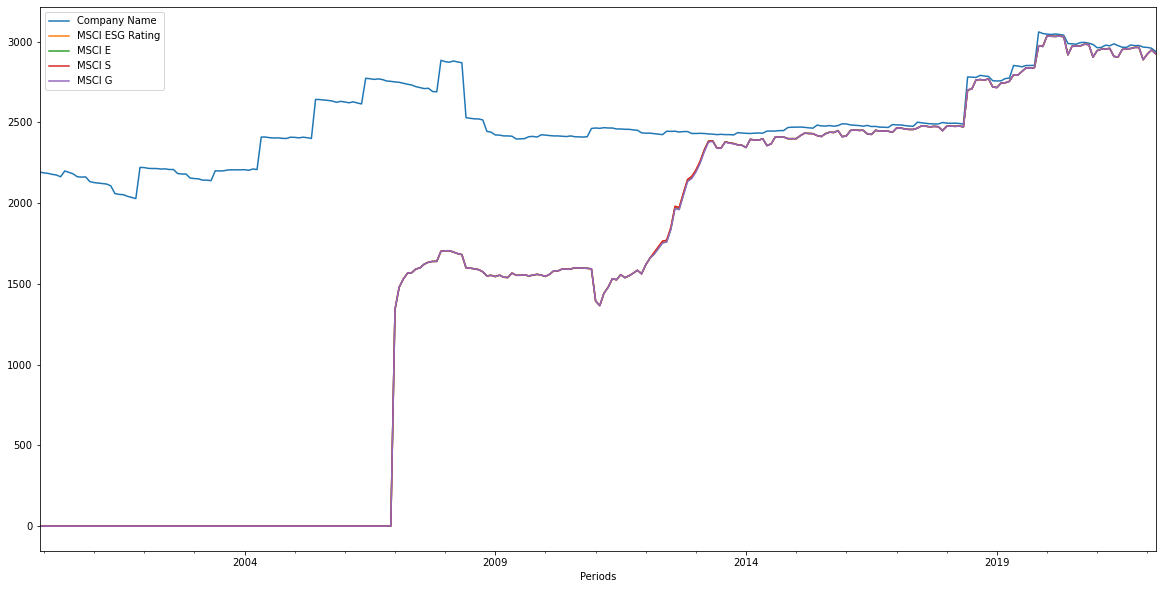

In [5]:
df_datacount = df.pivot_table(df, index=['Periods'], aggfunc='count')
df_datacount[['Company Name', 'MSCI ESG Rating', 'MSCI E', 'MSCI S', 'MSCI G']].plot(kind = 'line', figsize = (20,10))

# ESG 데이터는 2007년 초부터 시작

<AxesSubplot:xlabel='Periods'>

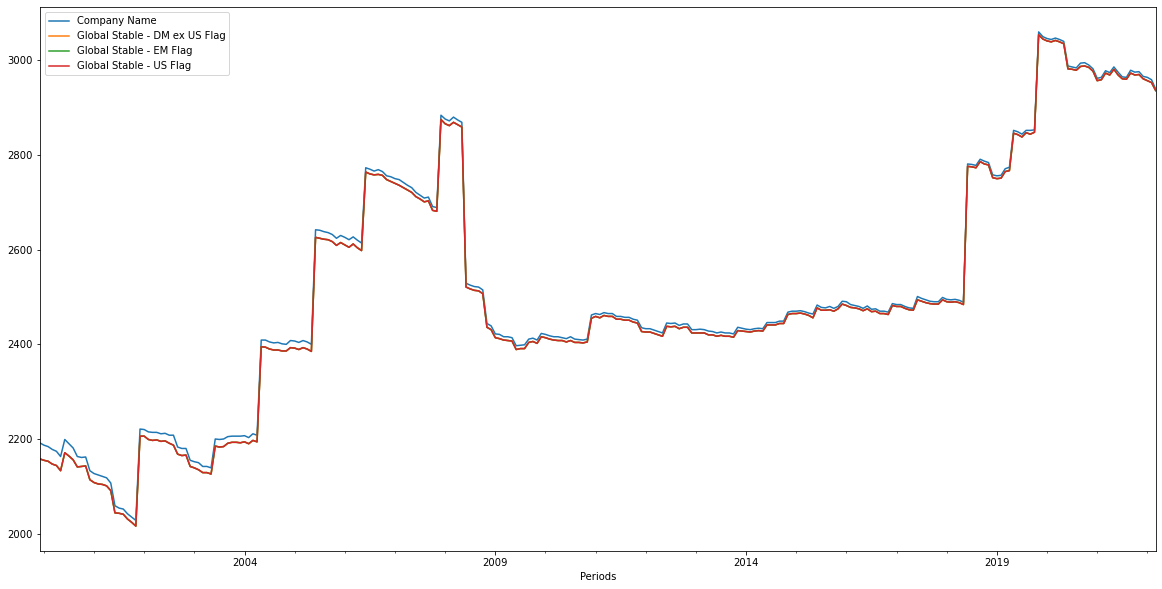

In [6]:
df_datacount = df.pivot_table(df, index=['Periods'], aggfunc='count')
df_datacount[['Company Name', 'Global Stable - DM ex US Flag', 'Global Stable - EM Flag', 'Global Stable - US Flag']].plot(kind = 'line', figsize = (20,10))

# 목표: ESG와 전통팩터 사이의 민감도 계산
1. DM ex US, EM, US 세 지역 & 섹터로 구분
2. 각 지역 내 ESG와 각 전통팩터 사이의 회귀식 계산 (기간 2007.01.31~2021.03.31; Monthly)
3. 3년 Rolling 회귀식 계산
4. beta over time의 consistency 확인 및 비교
5. 공분산/상관관계 벡터 생성
6. Valuation 조정팩터 계산 후 적용

** ESG 지표가 펀더멘털/가격팩터의 선행지표가 될 수 있는가? 

In [7]:
# 1. DM ex US, EM, US 세 지역 & 섹터로 구분
condition = [(df['Global Stable - DM ex US Flag'] == 1), (df['Global Stable - EM Flag'] == 1), (df['Global Stable - US Flag'] == 1)]
value = ['DM ex US', 'EM', 'US']

df['region_class'] = np.select(condition, value)
df['region_class'].unique()

array(['DM ex US', 'US', 'EM', '0'], dtype=object)

In [8]:
df_DMXUS_2007 = df[(df['Periods'] >= "2007-01-31") & (df['region_class'] == "DM ex US") & 
    ((df['Sector'] == "Industrials") | (df['Sector'] == "Materials") | (df['Sector'] == "Energy") | (df['Sector'] == "Utilities"))]
df_DMXUS_2007['Periods'].unique()[:8]

array(['2007-01-31T00:00:00.000000000', '2007-02-28T00:00:00.000000000',
       '2007-03-30T00:00:00.000000000', '2007-04-30T00:00:00.000000000',
       '2007-05-31T00:00:00.000000000', '2007-06-29T00:00:00.000000000',
       '2007-07-31T00:00:00.000000000', '2007-08-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [9]:
df_DMXUS_2007_dropna = df_DMXUS_2007.dropna(subset=['MSCI E', 'Global Stable - DM ex US BTP'])

<AxesSubplot:xlabel='Global Stable - DM ex US BTP', ylabel='MSCI E'>

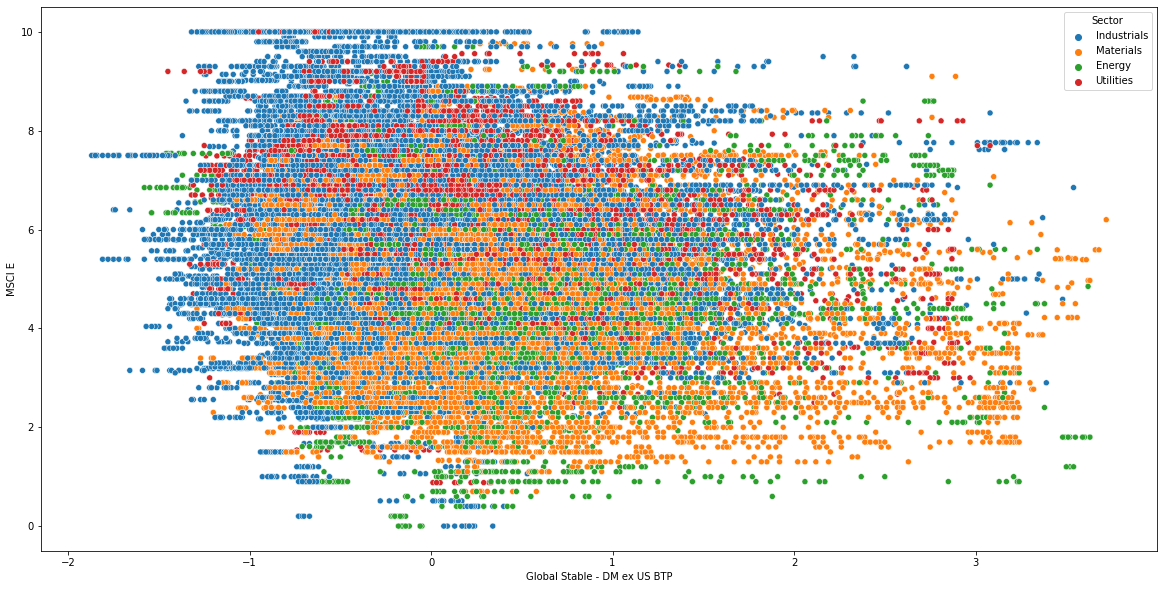

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = df_DMXUS_2007_dropna, x = "Global Stable - DM ex US BTP", y = "MSCI E", hue = "Sector", ax = ax)

In [11]:
# 2. 각 지역 내 ESG와 각 전통팩터 사이의 회귀식 계산 (기간 2007.01.31~2021.03.31; Monthly)

y = df_DMXUS_2007_dropna['MSCI E']
X = df_DMXUS_2007_dropna['Global Stable - DM ex US BTP']

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 MSCI E   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              5.705
Date:                Sun, 26 Jun 2022   Prob (F-statistic):                      0.0169
Time:                        08:17:32   Log-Likelihood:                     -2.1663e+05
No. Observations:               68000   AIC:                                  4.333e+05
Df Residuals:                   67999   BIC:                                  4.333e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [12]:
df_DMXUS_2007_dropna_corr = df_DMXUS_2007_dropna.groupby('Sector')[['MSCI E', 'Global Stable - DM ex US BTP', 'Global Stable - DM ex US QUAL', 'Global Stable - DM ex US Earnings Variability', 'Global Stable - DM ex US PROFIT']].corr().reset_index()
df_DMXUS_2007_dropna_corr

,Sector,level_1,MSCI E,Global Stable - DM ex US BTP,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US PROFIT
0,Energy,MSCI E,1.000000,-0.116317,-0.218716,-0.265170,0.127815
1,Energy,Global Stable - DM ex US BTP,-0.116317,1.000000,0.311220,0.414757,-0.348405
2,Energy,Global Stable - DM ex US QUAL,-0.218716,0.311220,1.000000,0.218291,0.001066
3,Energy,Global Stable - DM ex US Earnings Variability,-0.265170,0.414757,0.218291,1.000000,-0.324218
4,Energy,Global Stable - DM ex US PROFIT,0.127815,-0.348405,0.001066,-0.324218,1.000000
5,Industrials,MSCI E,1.000000,-0.084865,0.008856,-0.079410,0.054615
6,Industrials,Global Stable - DM ex US BTP,-0.084865,1.000000,0.238534,0.348773,-0.331907
7,Industrials,Global Stable - DM ex US QUAL,0.008856,0.238534,1.000000,0.176097,-0.080177
8,Industrials,Global Stable - DM ex US Earnings Variability,-0.079410,0.348773,0.176097,1.000000,-0.247955
9,Industrials,Global Stable - DM ex US PROFIT,0.054615,-0.331907,-0.080177,-0.247955,1.000000


In [13]:
df_DMXUS_2007_dropna_corr = df_DMXUS_2007_dropna_corr.drop(columns = ['Global Stable - DM ex US BTP', 'Global Stable - DM ex US QUAL', 'Global Stable - DM ex US Earnings Variability', 'Global Stable - DM ex US PROFIT'])

In [14]:
df_DMXUS_2007_dropna_corr = df_DMXUS_2007_dropna_corr.drop(df_DMXUS_2007_dropna_corr[df_DMXUS_2007_dropna_corr['MSCI E'] == 1].index)

In [15]:
df_DMXUS_2007_dropna_corr.reset_index()

,index,Sector,level_1,MSCI E
0,1,Energy,Global Stable - DM ex US BTP,-0.116317
1,2,Energy,Global Stable - DM ex US QUAL,-0.218716
2,3,Energy,Global Stable - DM ex US Earnings Variability,-0.265170
3,4,Energy,Global Stable - DM ex US PROFIT,0.127815
4,6,Industrials,Global Stable - DM ex US BTP,-0.084865
5,7,Industrials,Global Stable - DM ex US QUAL,0.008856
6,8,Industrials,Global Stable - DM ex US Earnings Variability,-0.079410
7,9,Industrials,Global Stable - DM ex US PROFIT,0.054615
8,11,Materials,Global Stable - DM ex US BTP,-0.174871
9,12,Materials,Global Stable - DM ex US QUAL,-0.086261


In [16]:
df_DMXUS_2007_dropna_corr_t = df_DMXUS_2007_dropna_corr.transpose()

In [17]:
df_DMXUS_2007_dropna_corr_t

,1,2,3,4,6,7,8,9,11,12,13,14,16,17,18,19
Sector,Energy,Energy,Energy,Energy,Industrials,Industrials,Industrials,Industrials,Materials,Materials,Materials,Materials,Utilities,Utilities,Utilities,Utilities
level_1,Global Stable - DM ex US BTP,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US PROFIT,Global Stable - DM ex US BTP,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US PROFIT,Global Stable - DM ex US BTP,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US PROFIT,Global Stable - DM ex US BTP,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US PROFIT
MSCI E,-0.116317,-0.218716,-0.26517,0.127815,-0.084865,0.008856,-0.07941,0.054615,-0.174871,-0.086261,-0.383771,0.040941,-0.203634,-0.169036,-0.216847,0.165332


<AxesSubplot:>

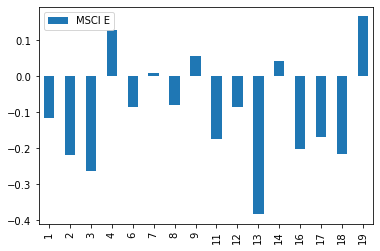

In [18]:
# 다른 팩터들에 비해 Profit 팩터는 Environment 스코어와 미미하지만 양의 상관관계를 보임.

df_DMXUS_2007_dropna_corr.plot(kind = 'bar')

In [19]:
df_DMXUS_2007_dropna_utilities = df_DMXUS_2007_dropna[df_DMXUS_2007_dropna['Sector'] == "Utilities"]

<AxesSubplot:xlabel='Global Stable - DM ex US PROFIT', ylabel='MSCI E'>

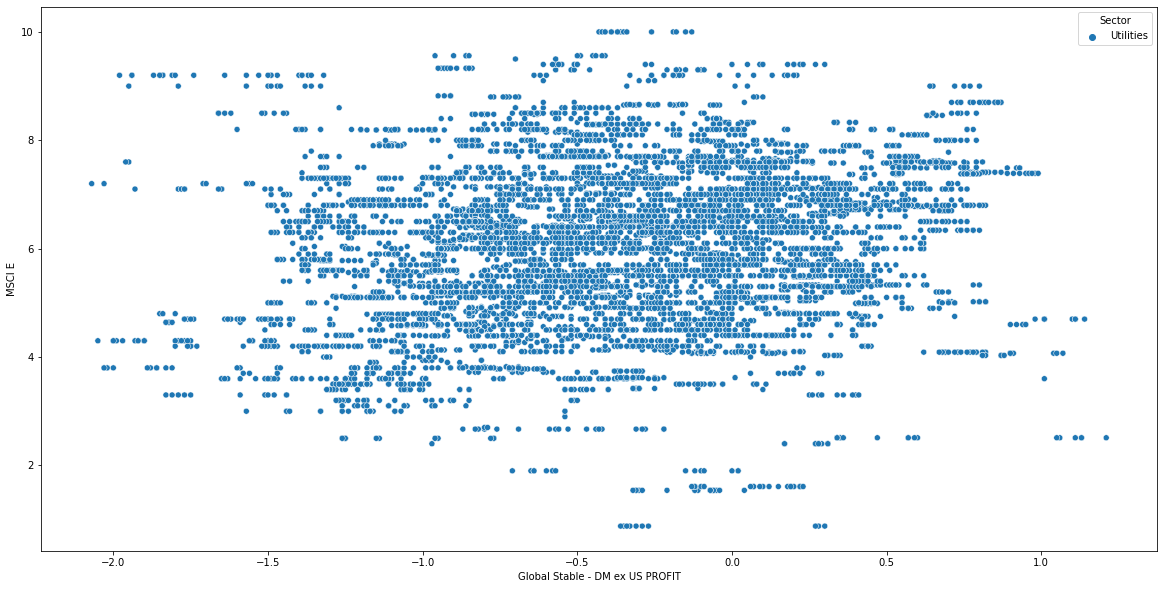

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = df_DMXUS_2007_dropna_utilities, x = "Global Stable - DM ex US PROFIT", y = "MSCI E", hue = "Sector", ax = ax)

In [21]:
# 3. 3년 Rolling 회귀식 계산

condition = [(df['Global Stable - DM ex US Flag'] == 1), (df['Global Stable - EM Flag'] == 1), (df['Global Stable - US Flag'] == 1)]
value = ['DM ex US', 'EM', 'US']

df['region_class'] = np.select(condition, value)

df_DMXUS_2007_select_sct = df[(df['Periods'] >=  "2007-01-31") & (df['region_class'] == "DM ex US") & ((df['Sector'] == "Utilities") | (df['Sector'] == "Energy"))]
df_DMXUS_2007_select_sct

,Unnamed: 0,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,...,Global Stable - EM PROFIT,Global Stable - US PROFIT,Global Stable - DM ex US RESVOL,Global Stable - EM RESVOL,Global Stable - US RESVOL,Global Stable - DM ex US SIZE,Global Stable - EM SIZE,Global Stable - US SIZE,Global Stable - US MIDCAP,region_class
241702,621486,Origin Energy Limited,2007-01-31,ORG-AU,-0.63,Asia/Pacific Ex Japan,Australia,Energy,6022.55,4.12,...,0.0,0.0,0.39,0.0,0.0,-0.38,0.0,0.0,0.0,DM ex US
81049,263955,Niko Resources Ltd.,2007-01-31,NKO-CA,-3.04,North America,Canada,Energy,3536.39,-1.05,...,0.0,0.0,0.93,0.0,0.0,-0.97,0.0,0.0,0.0,DM ex US
27634,79087,Scottish and Southern Energy PLC,2007-01-31,SSE-GB,-2.82,Europe,United Kingdom,Utilities,25238.43,5.18,...,0.0,0.0,-0.06,0.0,0.0,-0.06,0.0,0.0,0.0,DM ex US
210054,609701,CLP Holdings Limited,2007-01-31,2-HK,-1.84,Asia/Pacific Ex Japan,Hong Kong,Utilities,17979.23,8.44,...,0.0,0.0,0.18,0.0,0.0,0.44,0.0,0.0,0.0,DM ex US
141228,476896,RWE AG,2007-01-31,RWE-DE,-2.03,Europe,Germany,Utilities,57932.24,5.58,...,0.0,0.0,0.15,0.0,0.0,0.50,0.0,0.0,0.0,DM ex US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160349,527178,Endesa S.A.,2022-03-31,ELE-ES,-3.96,Europe,Spain,Utilities,23295.35,7.43,...,0.0,0.0,0.08,0.0,0.0,-0.03,0.0,0.0,0.0,DM ex US
529913,B15C55,TotalEnergies SE,2022-03-31,TTE-FR,-2.72,Europe,France,Energy,133659.77,11.79,...,0.0,0.0,-0.23,0.0,0.0,0.73,0.0,0.0,0.0,DM ex US
656295,BYVS6J,CK Infrastructure Holdings Limited,2022-03-31,1038-HK,0.57,Asia/Pacific Ex Japan,Hong Kong,Utilities,16874.84,5.63,...,0.0,0.0,0.13,0.0,0.0,-0.20,0.0,0.0,0.0,DM ex US
375252,677670,Santos Limited,2022-03-31,STO-AU,-2.19,Asia/Pacific Ex Japan,Australia,Energy,19685.98,3.27,...,0.0,0.0,0.44,0.0,0.0,-0.08,0.0,0.0,0.0,DM ex US


In [22]:
df_DMXUS_2007_select_sct['year'] = pd.to_datetime(df_DMXUS_2007_select_sct['Periods']).dt.year
df_DMXUS_2007_select_sct

C:\Users\jchoi02\AppData\Local\Temp/ipykernel_6620/3397713726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DMXUS_2007_select_sct['year'] = pd.to_datetime(df_DMXUS_2007_select_sct['Periods']).dt.year


,Unnamed: 0,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,...,Global Stable - US PROFIT,Global Stable - DM ex US RESVOL,Global Stable - EM RESVOL,Global Stable - US RESVOL,Global Stable - DM ex US SIZE,Global Stable - EM SIZE,Global Stable - US SIZE,Global Stable - US MIDCAP,region_class,year
241702,621486,Origin Energy Limited,2007-01-31,ORG-AU,-0.63,Asia/Pacific Ex Japan,Australia,Energy,6022.55,4.12,...,0.0,0.39,0.0,0.0,-0.38,0.0,0.0,0.0,DM ex US,2007
81049,263955,Niko Resources Ltd.,2007-01-31,NKO-CA,-3.04,North America,Canada,Energy,3536.39,-1.05,...,0.0,0.93,0.0,0.0,-0.97,0.0,0.0,0.0,DM ex US,2007
27634,79087,Scottish and Southern Energy PLC,2007-01-31,SSE-GB,-2.82,Europe,United Kingdom,Utilities,25238.43,5.18,...,0.0,-0.06,0.0,0.0,-0.06,0.0,0.0,0.0,DM ex US,2007
210054,609701,CLP Holdings Limited,2007-01-31,2-HK,-1.84,Asia/Pacific Ex Japan,Hong Kong,Utilities,17979.23,8.44,...,0.0,0.18,0.0,0.0,0.44,0.0,0.0,0.0,DM ex US,2007
141228,476896,RWE AG,2007-01-31,RWE-DE,-2.03,Europe,Germany,Utilities,57932.24,5.58,...,0.0,0.15,0.0,0.0,0.50,0.0,0.0,0.0,DM ex US,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160349,527178,Endesa S.A.,2022-03-31,ELE-ES,-3.96,Europe,Spain,Utilities,23295.35,7.43,...,0.0,0.08,0.0,0.0,-0.03,0.0,0.0,0.0,DM ex US,2022
529913,B15C55,TotalEnergies SE,2022-03-31,TTE-FR,-2.72,Europe,France,Energy,133659.77,11.79,...,0.0,-0.23,0.0,0.0,0.73,0.0,0.0,0.0,DM ex US,2022
656295,BYVS6J,CK Infrastructure Holdings Limited,2022-03-31,1038-HK,0.57,Asia/Pacific Ex Japan,Hong Kong,Utilities,16874.84,5.63,...,0.0,0.13,0.0,0.0,-0.20,0.0,0.0,0.0,DM ex US,2022
375252,677670,Santos Limited,2022-03-31,STO-AU,-2.19,Asia/Pacific Ex Japan,Australia,Energy,19685.98,3.27,...,0.0,0.44,0.0,0.0,-0.08,0.0,0.0,0.0,DM ex US,2022


In [23]:
df_DMXUS_2007_select_sct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19038 entries, 241702 to 633546
Data columns (total 66 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Unnamed: 0                                     19038 non-null  object        
 1   Company Name                                   19038 non-null  object        
 2   Periods                                        19038 non-null  datetime64[ns]
 3   Ticker                                         19038 non-null  object        
 4   Universe Returns                               19020 non-null  float64       
 5   Region                                         19038 non-null  object        
 6   Country                                        19038 non-null  object        
 7   Sector                                         19038 non-null  object        
 8   MCAP_USD                                       190

In [24]:
df_DMXUS_2010_select_sct = df_DMXUS_2007_select_sct[df_DMXUS_2007_select_sct['year'] == 2010] ## year 칼럼이 integer여서 ""없이 2010 숫자만 써야함
df_DMXUS_2010_select_sct

,Unnamed: 0,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,...,Global Stable - US PROFIT,Global Stable - DM ex US RESVOL,Global Stable - EM RESVOL,Global Stable - US RESVOL,Global Stable - DM ex US SIZE,Global Stable - EM SIZE,Global Stable - US SIZE,Global Stable - US MIDCAP,region_class,year
54638,217157,Canadian Natural Resources Limited,2010-01-29,CNQ-CA,4.69,North America,Canada,Energy,34738.45,7.06,...,0.0,0.13,0.0,0.0,0.70,0.0,0.0,0.0,DM ex US,2010
563303,B3B8D0,SUEZ SA,2010-01-29,SEV-FR,-3.28,Europe,France,Utilities,11176.39,6.21,...,0.0,-0.68,0.0,0.0,-0.64,0.0,0.0,0.0,DM ex US,2010
504794,B06YV4,Neste Oil Oyj,2010-01-29,NESTE-FI,-13.24,Europe,Finland,Energy,4226.77,-2.17,...,0.0,-1.16,0.0,0.0,-0.63,0.0,0.0,0.0,DM ex US,2010
288011,643532,Power Assets Holdings Limited,2010-01-29,6-HK,0.03,Asia/Pacific Ex Japan,Hong Kong,Utilities,11941.14,8.64,...,0.0,-0.52,0.0,0.0,0.15,0.0,0.0,0.0,DM ex US,2010
400454,689526,"Tohoku Electric Power Company, Incorporated",2010-01-29,9506-JP,8.35,Japan,Japan,Utilities,10095.93,0.43,...,0.0,0.30,0.0,0.0,0.10,0.0,0.0,0.0,DM ex US,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115775,410359,EDP-Energias de Portugal SA,2010-12-31,EDP-PT,15.12,Europe,Portugal,Utilities,14626.58,9.69,...,0.0,-0.22,0.0,0.0,0.46,0.0,0.0,0.0,DM ex US,2010
584169,B67JFX,Bonavista Energy Corporation,2010-12-31,BNP-CA,2.27,North America,Canada,Energy,3879.22,4.99,...,0.0,-0.67,0.0,0.0,-0.84,0.0,0.0,0.0,DM ex US,2010
286599,643132,"Hokkaido Electric Power Company,Incorporated",2010-12-31,9509-JP,1.74,Japan,Japan,Utilities,4406.44,1.93,...,0.0,-0.60,0.0,0.0,-0.57,0.0,0.0,0.0,DM ex US,2010
584204,B67M82,Pengrowth Energy Corporation,2010-12-31,PGF-CA,-1.36,North America,Canada,Energy,4137.34,6.48,...,0.0,-0.83,0.0,0.0,-0.89,0.0,0.0,0.0,DM ex US,2010


In [25]:
df_DMXUS_2010_select_sct_corr = df_DMXUS_2010_select_sct.groupby('Sector')[['MSCI E', 'Global Stable - DM ex US BTP', 'Global Stable - DM ex US QUAL', 'Global Stable - DM ex US Earnings Variability', 'Global Stable - DM ex US PROFIT']].corr().reset_index()
df_DMXUS_2010_select_sct_corr

,Sector,level_1,MSCI E,Global Stable - DM ex US BTP,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US PROFIT
0,Energy,MSCI E,1.000000,-0.021183,-0.090598,-0.174207,0.013941
1,Energy,Global Stable - DM ex US BTP,-0.021183,1.000000,0.314540,0.095357,-0.251449
2,Energy,Global Stable - DM ex US QUAL,-0.090598,0.314540,1.000000,0.036736,0.051423
3,Energy,Global Stable - DM ex US Earnings Variability,-0.174207,0.095357,0.036736,1.000000,-0.467961
4,Energy,Global Stable - DM ex US PROFIT,0.013941,-0.251449,0.051423,-0.467961,1.000000
5,Utilities,MSCI E,1.000000,-0.003414,-0.194326,0.097414,0.137362
6,Utilities,Global Stable - DM ex US BTP,-0.003414,1.000000,0.224856,0.477249,-0.296034
7,Utilities,Global Stable - DM ex US QUAL,-0.194326,0.224856,1.000000,0.103706,-0.272377
8,Utilities,Global Stable - DM ex US Earnings Variability,0.097414,0.477249,0.103706,1.000000,-0.311767
9,Utilities,Global Stable - DM ex US PROFIT,0.137362,-0.296034,-0.272377,-0.311767,1.000000


<AxesSubplot:xlabel='Global Stable - DM ex US PROFIT', ylabel='MSCI E'>

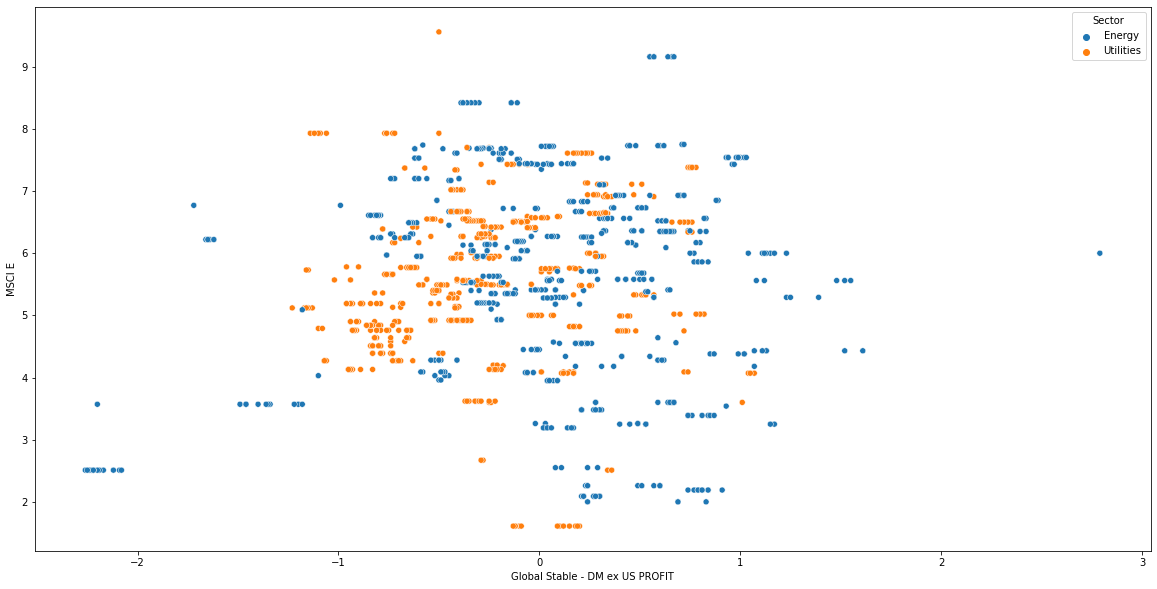

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data = df_DMXUS_2010_select_sct, x = "Global Stable - DM ex US PROFIT", y = "MSCI E", hue = "Sector", ax = ax)

# 3년 롤링 베타

In [27]:
df_DMXUS_2007

,Unnamed: 0,Company Name,Periods,Ticker,Universe Returns,Region,Country,Sector,MCAP_USD,Earnings Yield,...,Global Stable - EM PROFIT,Global Stable - US PROFIT,Global Stable - DM ex US RESVOL,Global Stable - EM RESVOL,Global Stable - US RESVOL,Global Stable - DM ex US SIZE,Global Stable - EM SIZE,Global Stable - US SIZE,Global Stable - US MIDCAP,region_class
328303,656946,Marubeni Corporation,2007-01-31,8002-JP,16.70,Japan,Japan,Industrials,8981.65,8.39,...,0.0,0.0,-0.54,0.0,0.0,-0.20,0.0,0.0,0.0,DM ex US
127828,449123,Kingspan Group Plc,2007-01-31,KRX-IE,8.11,Europe,Ireland,Industrials,4251.10,3.67,...,0.0,0.0,-0.21,0.0,0.0,-0.69,0.0,0.0,0.0,DM ex US
66694,234539,Ritchie Bros. Auctioneers Incorporated,2007-01-31,RBA-CA,-3.08,North America,Canada,Industrials,2048.25,3.00,...,0.0,0.0,0.58,0.0,0.0,-1.24,0.0,0.0,0.0,DM ex US
388511,685856,"Sumitomo Chemical Co., Ltd.",2007-01-31,4005-JP,-1.31,Japan,Japan,Materials,12741.57,6.23,...,0.0,0.0,-0.10,0.0,0.0,0.09,0.0,0.0,0.0,DM ex US
502495,B058TZ,Safran S.A.,2007-01-31,SAF-FR,-3.15,Europe,France,Industrials,9862.75,-1.32,...,0.0,0.0,0.27,0.0,0.0,-0.89,0.0,0.0,0.0,DM ex US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655508,BYTBWY,Covestro AG,2022-03-31,1COV-DE,-7.56,Europe,Germany,Materials,9853.95,18.87,...,0.0,0.0,-1.05,0.0,0.0,-0.89,0.0,0.0,0.0,DM ex US
528738,B13X01,Eiffage SA,2022-03-31,FGR-FR,-3.97,Europe,France,Industrials,10166.86,9.00,...,0.0,0.0,-1.70,0.0,0.0,-1.19,0.0,0.0,0.0,DM ex US
529000,B142S6,Kuehne & Nagel International AG,2022-03-31,KNIN-CH,-0.87,Europe,Switzerland,Industrials,34523.58,6.28,...,0.0,0.0,0.45,0.0,0.0,-0.28,0.0,0.0,0.0,DM ex US
405554,690058,Toyota Tsusho Corp.,2022-03-31,8015-JP,-13.08,Japan,Japan,Industrials,14760.25,13.92,...,0.0,0.0,-0.40,0.0,0.0,-0.10,0.0,0.0,0.0,DM ex US


In [28]:
df_DMXUS_2007_dropcol = df_DMXUS_2007.drop(['Unnamed: 0', 'Universe Returns', 'Region', 'Country', 'MCAP_USD', 'Earnings Yield', 'Book to Price', 'MSCI ESG Rating', 'MSCI ESG Rating Quartile', 'MSCI S', 'MSCI G', 'Global Stable - DM ex US Flag', 'Global Stable - EM Flag', 'Global Stable - US Flag', 'Global Stable - EM Beta', 'Global Stable - US Beta', 'Global Stable - EM BTP', 'Global Stable - US BTP', 'Global Stable - EM DYLD', 'Global Stable - US DYLD', 'Global Stable - EM QUAL', 'Global Stable - US QUAL', 'Global Stable - EM Earnings Variability', 'Global Stable - US Earnings Variability', 'Global Stable - EM EYLD', 'Global Stable - US EYLD', 'Global Stable - EM LEV', 'Global Stable - US LEV', 'Global Stable - EM LIQ', 'Global Stable - US LIQ', 'Global Stable - EM LTREV', 'Global Stable - US LTREV', 'Global Stable - EM GMTQUAL', 'Global Stable - US MGTQUAL', 'Global Stable - EM MIDCAP',  'Global Stable - EM MOM', 'Global Stable - US MOM', 'Global Stable - EM PROFIT', 'Global Stable - US PROFIT', 'Global Stable - EM RESVOL', 'Global Stable - US RESVOL', 'Global Stable - EM SIZE', 'Global Stable - US SIZE', 'Global Stable - US MIDCAP', 'region_class'], axis=1)
df_DMXUS_2007_dropcol

,Company Name,Periods,Ticker,Sector,MSCI E,Global Stable - DM ex US Beta,Global Stable - DM ex US BTP,Global Stable - DM ex US DYLD,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US EYLD,Global Stable - DM ex US LEV,Global Stable - DM ex US LIQ,Global Stable - DM ex US LTREV,Global Stable - DM ex US MGTQUAL,Global Stable - DM ex US MIDCAP,Global Stable - DM ex US MOM,Global Stable - DM ex US PROFIT,Global Stable - DM ex US RESVOL,Global Stable - DM ex US SIZE
328303,Marubeni Corporation,2007-01-31,8002-JP,Industrials,3.96,1.28,0.34,0.25,0.20,1.57,1.82,2.06,0.74,-2.13,0.04,0.38,-0.35,-0.59,-0.54,-0.20
127828,Kingspan Group Plc,2007-01-31,KRX-IE,Industrials,NaN,0.16,-0.52,-0.75,0.90,-0.18,-0.71,-1.49,0.11,-1.18,0.00,0.80,1.47,1.49,-0.21,-0.69
66694,Ritchie Bros. Auctioneers Incorporated,2007-01-31,RBA-CA,Industrials,NaN,-1.42,-0.64,-0.34,0.47,-1.09,-1.14,-1.02,-1.57,0.04,0.62,0.99,0.23,1.27,0.58,-1.24
388511,"Sumitomo Chemical Co., Ltd.",2007-01-31,4005-JP,Materials,6.34,1.00,-0.04,-0.04,0.44,-0.38,0.52,-0.13,0.33,-0.57,-0.08,0.08,-0.16,0.17,-0.10,0.09
502495,Safran S.A.,2007-01-31,SAF-FR,Industrials,6.53,0.85,0.69,-0.28,0.77,1.51,-1.52,-0.65,-0.02,0.10,-2.67,0.91,-1.04,-1.24,0.27,-0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655508,Covestro AG,2022-03-31,1COV-DE,Materials,5.20,0.91,0.45,0.85,-0.02,0.52,1.78,-0.80,1.29,-0.48,0.10,0.91,-0.70,0.78,-1.05,-0.89
528738,Eiffage SA,2022-03-31,FGR-FR,Industrials,4.70,0.93,0.20,0.54,0.78,-0.41,0.52,2.03,0.79,0.79,0.19,0.99,-0.11,-0.14,-1.70,-1.19
529000,Kuehne & Nagel International AG,2022-03-31,KNIN-CH,Industrials,8.80,-0.39,-0.39,0.03,-0.30,1.01,0.28,0.10,-0.28,-1.23,-0.65,0.44,0.19,1.75,0.45,-0.28
405554,Toyota Tsusho Corp.,2022-03-31,8015-JP,Industrials,7.10,1.42,0.44,0.40,-0.22,-0.42,0.87,0.72,-0.56,-0.53,-0.07,0.27,-0.06,-0.26,-0.40,-0.10


In [29]:
# 매월 베타 계산

df_DMXUS_2007_dropcol_corr = df_DMXUS_2007_dropcol.groupby(['Periods']).corr()
df_DMXUS_2007_dropcol_corr

MSCI E  \
Periods                                                
2007-01-31 MSCI E                           1.000000   
           Global Stable - DM ex US Beta    0.079373   
           Global Stable - DM ex US BTP     0.055403   
           Global Stable - DM ex US DYLD    0.004658   
           Global Stable - DM ex US QUAL    0.081077   
...                                              ...   
2022-03-31 Global Stable - DM ex US MIDCAP -0.069052   
           Global Stable - DM ex US MOM    -0.273711   
           Global Stable - DM ex US PROFIT -0.091690   
           Global Stable - DM ex US RESVOL -0.204484   
           Global Stable - DM ex US SIZE    0.061029   

                                            Global Stable - DM ex US Beta  \
Periods                                                                     
2007-01-31 MSCI E                                                0.079373   
           Global Stable - DM ex US Beta                         1.000000   
           Global Stable - DM ex US BTP                         -0.244064   
           Global Stable - DM ex US DYLD                        -0.313060   
           Global Stable - DM ex US QUAL                        -0.237085   
...                                                                   ...   
2022-03-31 Global Stable - DM ex US MIDCAP                       0.059551   
           Global Stable - DM ex US MOM                         -0.382628   
           Global Stable - DM ex US PROFIT                      -0.016165   
           Global Stable - DM ex US RESVOL                      -0.181744   
           Global Stable - DM ex US SIZE                        -0.109359   

                                            Global Stable - DM ex US BTP  \
Periods                                                                    
2007-01-31 MSCI E                                               0.055403   
           Global Stable - DM ex US Beta                       -0.244064   
           Global Stable - DM ex US BTP                         1.000000   
           Global Stable - DM ex US DYLD                        0.224242   
           Global Stable - DM ex US QUAL                        0.130203   
...                                                                  ...   
2022-03-31 Global Stable - DM ex US MIDCAP                      0.128669   
           Global Stable - DM ex US MOM                         0.063390   
           Global Stable - DM ex US PROFIT                     -0.289264   
           Global Stable - DM ex US RESVOL                     -0.139390   
           Global Stable - DM ex US SIZE                       -0.130615   

                                            Global Stable - DM ex US DYLD  \
Periods                                                                     
2007-01-31 MSCI E                                                0.004658   
           Global Stable - DM ex US Beta                        -0.313060   
           Global Stable - DM ex US BTP                          0.224242   
           Global Stable - DM ex US DYLD                         1.000000   
           Global Stable - DM ex US QUAL                         0.052381   
...                                                                   ...   
2022-03-31 Global Stable - DM ex US MIDCAP                      -0.143883   
           Global Stable - DM ex US MOM                          0.246402   
           Global Stable - DM ex US PROFIT                       0.140882   
           Global Stable - DM ex US RESVOL                      -0.190676   
           Global Stable - DM ex US SIZE                         0.144122   

                                            Global Stable - DM ex US QUAL  \
Periods                                                                     
2007-01-31 MSCI E                                                0.081077   
           Global Stable - DM ex US Beta                        -0.237085   
           Globa

In [30]:
df_DMXUS_2007_dropcol_corr_E = df_DMXUS_2007_dropcol_corr[df_DMXUS_2007_dropcol_corr['MSCI E'] == 1]
df_DMXUS_2007_dropcol_corr_E

,,MSCI E,Global Stable - DM ex US Beta,Global Stable - DM ex US BTP,Global Stable - DM ex US DYLD,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US EYLD,Global Stable - DM ex US LEV,Global Stable - DM ex US LIQ,Global Stable - DM ex US LTREV,Global Stable - DM ex US MGTQUAL,Global Stable - DM ex US MIDCAP,Global Stable - DM ex US MOM,Global Stable - DM ex US PROFIT,Global Stable - DM ex US RESVOL,Global Stable - DM ex US SIZE
Periods,,,,,,,,,,,,,,,,,
2007-01-31,MSCI E,1.0,0.079373,0.055403,0.004658,0.081077,-0.153791,-0.023331,-0.018934,0.003311,0.135892,0.026523,-0.219275,0.012675,-0.075328,-0.123143,0.231589
2007-02-28,MSCI E,1.0,-0.002869,0.074570,0.060696,0.058852,-0.169978,-0.011213,0.042456,-0.024780,0.095655,0.036640,-0.256282,0.030387,-0.135646,-0.090197,0.269549
2007-03-30,MSCI E,1.0,-0.024971,0.057465,0.071211,0.070707,-0.184667,-0.012152,0.030763,-0.035945,0.083010,0.043835,-0.266517,0.000667,-0.141630,-0.118283,0.281029
2007-04-30,MSCI E,1.0,-0.056541,0.065359,0.104932,0.064556,-0.245533,0.036541,0.079382,-0.054698,0.103200,0.099020,-0.273244,0.035580,-0.092206,-0.162582,0.282110
2007-05-31,MSCI E,1.0,-0.044728,0.063446,0.088690,0.094019,-0.236159,0.057711,0.085824,-0.053628,0.076993,0.086694,-0.294569,0.039227,-0.126813,-0.103933,0.297260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,MSCI E,1.0,-0.096036,-0.180102,-0.023987,-0.144664,-0.273448,-0.211243,0.222852,-0.105454,-0.096624,0.056572,-0.095099,-0.018357,-0.045060,-0.184064,0.087735
2021-12-31,MSCI E,1.0,-0.097355,-0.163954,-0.026372,-0.138693,-0.266478,-0.207254,0.216143,-0.122389,-0.043982,0.081770,-0.103766,-0.052924,-0.067010,-0.190334,0.099468
2022-01-31,MSCI E,1.0,-0.094557,-0.143360,0.016270,-0.113956,-0.244836,-0.180185,0.216317,-0.096898,-0.038813,0.105829,-0.099662,-0.137706,-0.058051,-0.195515,0.090820


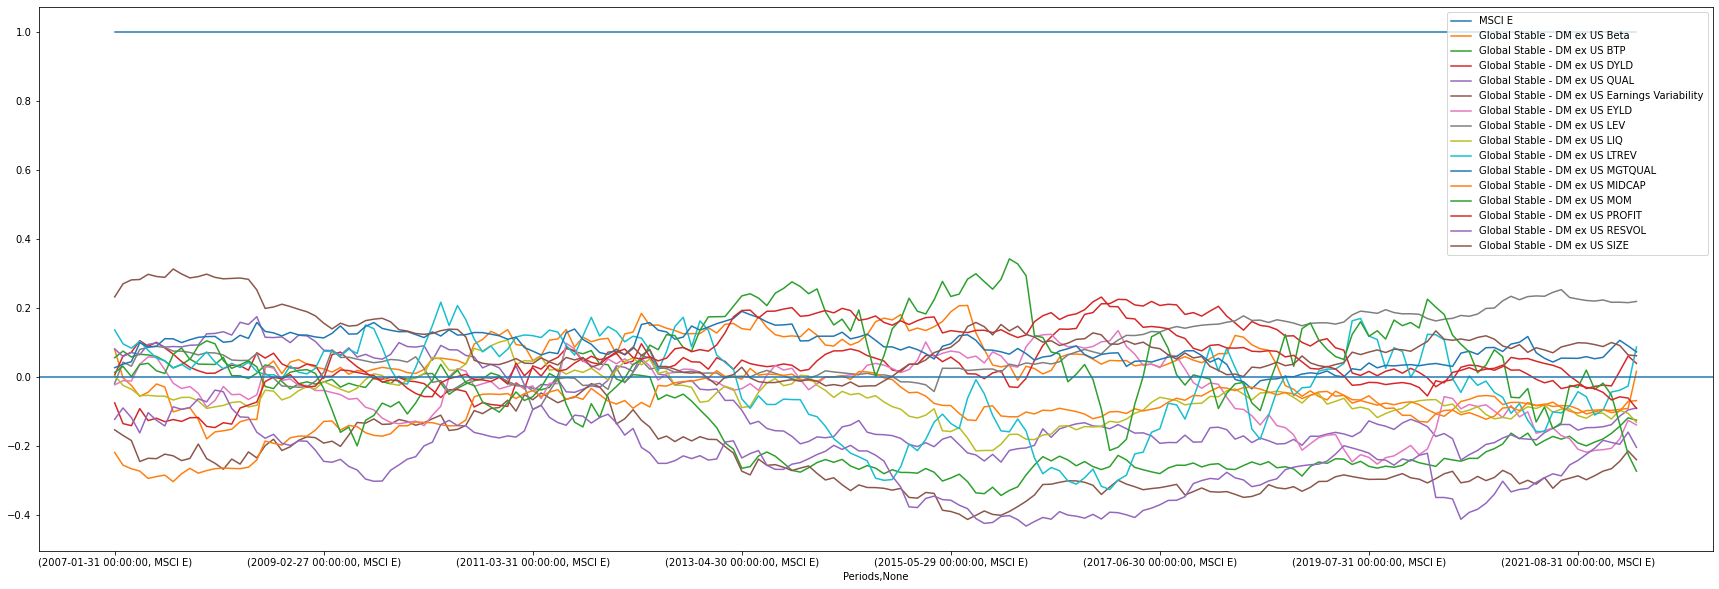

In [31]:
# 시간의 흐름에 따른 DMXUS 내 월별 Env 스코어 대비 베타 추이

df_DMXUS_2007_dropcol_corr_E.plot(kind = 'line', figsize=(30,10))
plt.axhline(y=0)

In [32]:
df_DMXUS_2007_dropcol_corr_E_roll = df_DMXUS_2007_dropcol_corr_E.rolling(3).mean()
df_DMXUS_2007_dropcol_corr_E_roll

,,MSCI E,Global Stable - DM ex US Beta,Global Stable - DM ex US BTP,Global Stable - DM ex US DYLD,Global Stable - DM ex US QUAL,Global Stable - DM ex US Earnings Variability,Global Stable - DM ex US EYLD,Global Stable - DM ex US LEV,Global Stable - DM ex US LIQ,Global Stable - DM ex US LTREV,Global Stable - DM ex US MGTQUAL,Global Stable - DM ex US MIDCAP,Global Stable - DM ex US MOM,Global Stable - DM ex US PROFIT,Global Stable - DM ex US RESVOL,Global Stable - DM ex US SIZE
Periods,,,,,,,,,,,,,,,,,
2007-01-31,MSCI E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,MSCI E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-30,MSCI E,1.0,0.017178,0.062479,0.045522,0.070212,-0.169479,-0.015565,0.018095,-0.019138,0.104852,0.035666,-0.247358,0.014576,-0.117535,-0.110541,0.260722
2007-04-30,MSCI E,1.0,-0.028127,0.065798,0.078946,0.064705,-0.200059,0.004392,0.050867,-0.038475,0.093955,0.059832,-0.265347,0.022211,-0.123161,-0.123687,0.277563
2007-05-31,MSCI E,1.0,-0.042080,0.062090,0.088278,0.076427,-0.222119,0.027367,0.065323,-0.048091,0.087734,0.076517,-0.278110,0.025158,-0.120216,-0.128266,0.286800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,MSCI E,1.0,-0.101667,-0.189790,-0.028633,-0.146358,-0.286212,-0.214382,0.221276,-0.110375,-0.088464,0.055792,-0.096538,-0.011768,-0.036676,-0.205229,0.093034
2021-12-31,MSCI E,1.0,-0.098207,-0.177749,-0.026072,-0.143455,-0.275553,-0.210629,0.219549,-0.111139,-0.083871,0.063569,-0.098453,-0.035892,-0.048751,-0.193791,0.093563
2022-01-31,MSCI E,1.0,-0.095983,-0.162472,-0.011363,-0.132437,-0.261587,-0.199561,0.218438,-0.108247,-0.059806,0.081390,-0.099509,-0.069662,-0.056707,-0.189971,0.092674


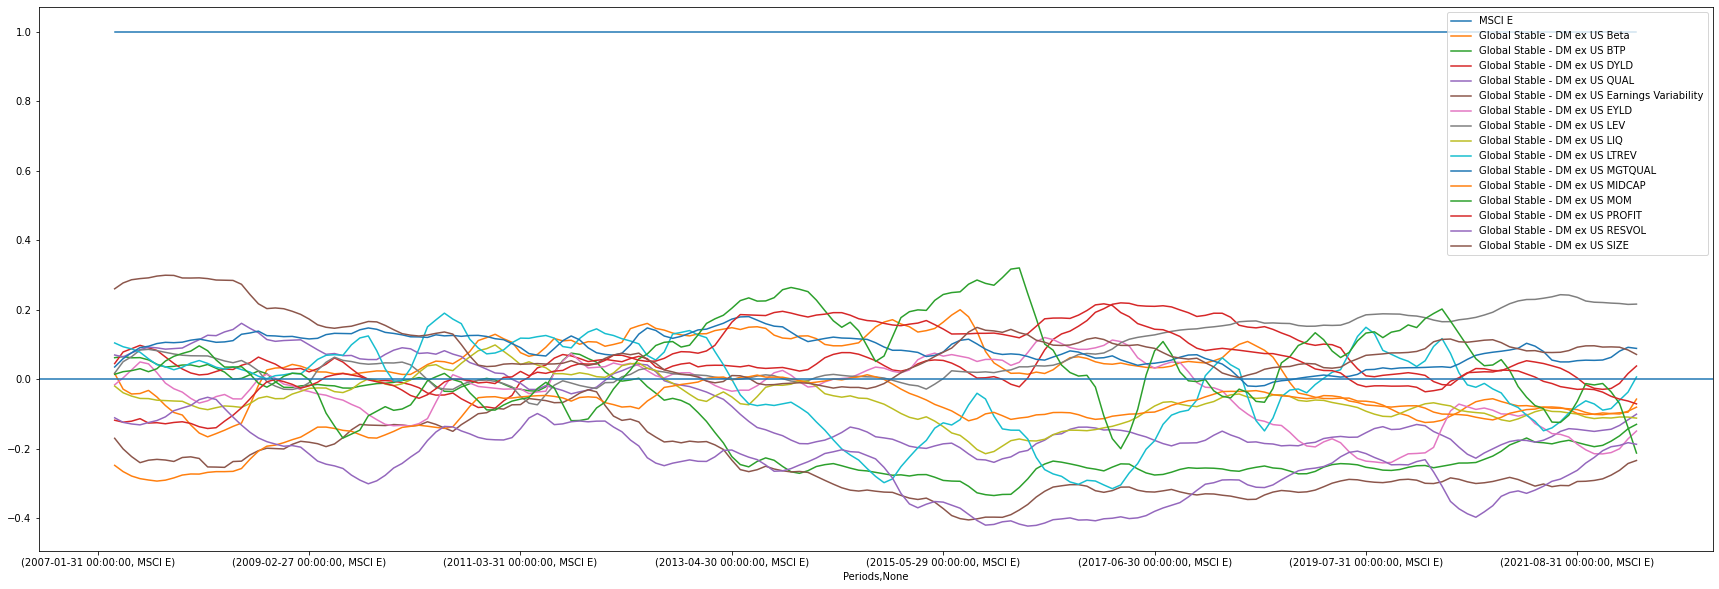

In [33]:
df_DMXUS_2007_dropcol_corr_E_roll.plot(kind = 'line', figsize = (30,10))
plt.axhline(y=0)

In [34]:
# 월별 베타, 롤링 평균 베타 모두 극명한 민감도가 관찰되지 않음. Env에 민감하지 않은 섹터가 섞여있기 때문이라 예상됨. 섹터를 필터해보자. 그러려면 적어도 df_DMXUS_2007_dropcol 단계까지는 올라가서 다시 작업해야 할 듯.

df_DMXUS_2007_dropcol['Sector'].unique() # 이미 df_DMXUS_2007 자체가 섹터필터 된 결과임.

array(['Industrials', 'Materials', 'Energy', 'Utilities'], dtype=object)

# 월별 베타 계산 후 롤링으로 단순 평균 계산은 쉽지만, 베타계산 자체를 롤링으로 할 수는 없나?